<a href="https://colab.research.google.com/github/KagontleBooysen/heart-disease-analysis/blob/master/Heart_Disease_UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset into a DataFrame
url = 'https://archive.ics.uci.edu/static/public/45/data.csv'
df = pd.read_csv(url)

In [2]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head(5))

First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [3]:
# Display summary statistics of the dataset
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std   

In [4]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())
#Find the total number of missing values from the entire dataset
df.isnull().sum().sum()


Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


6

In [5]:
# Display information about the dataset
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


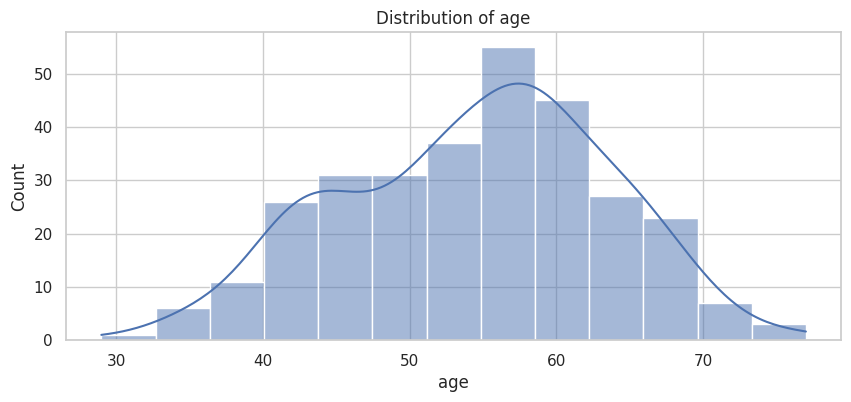

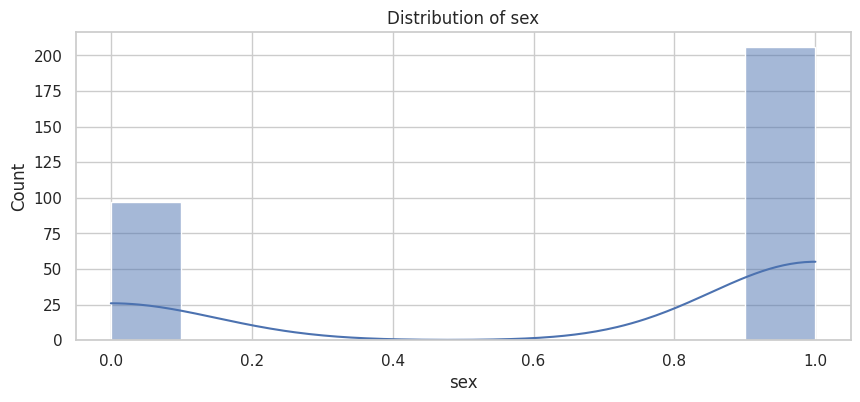

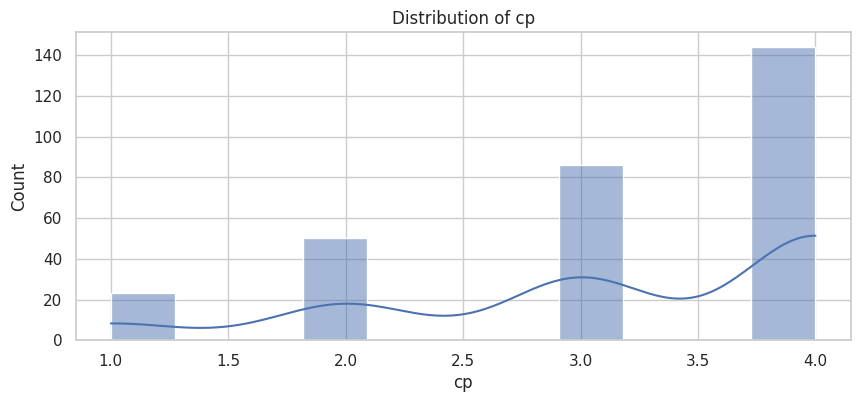

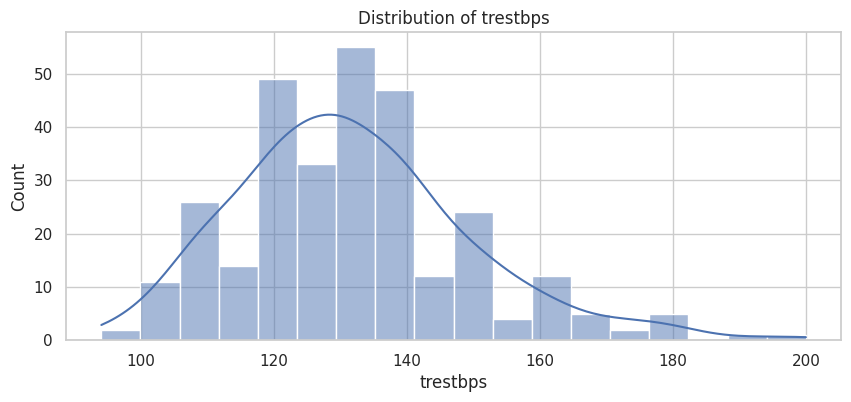

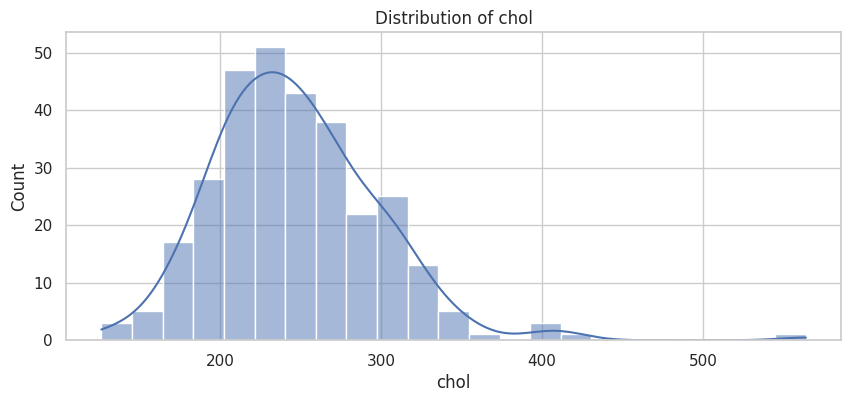

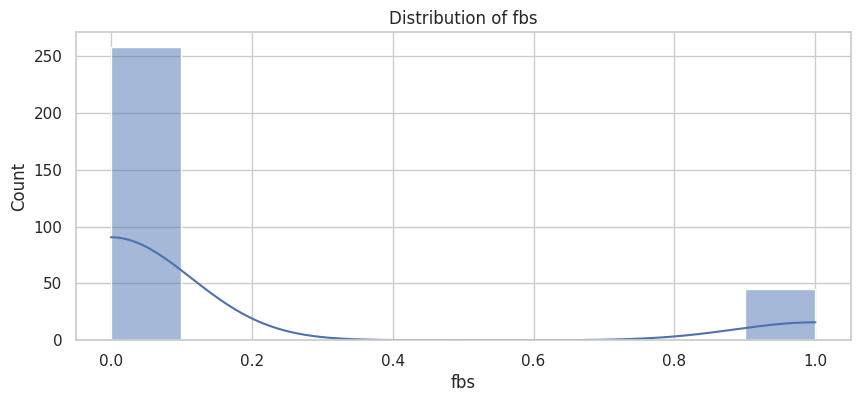

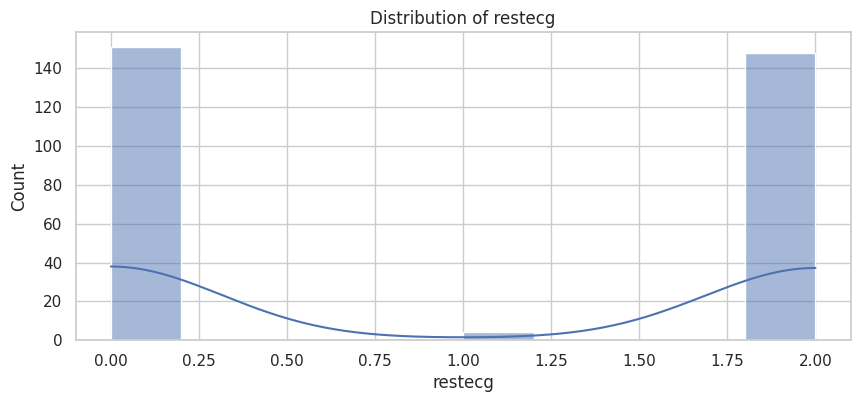

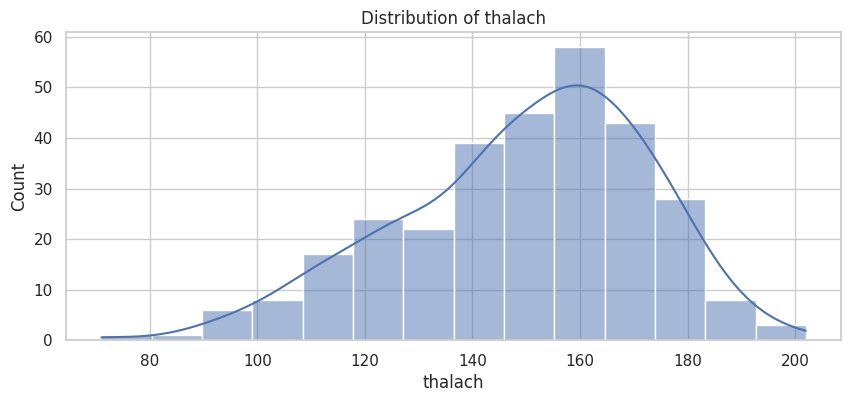

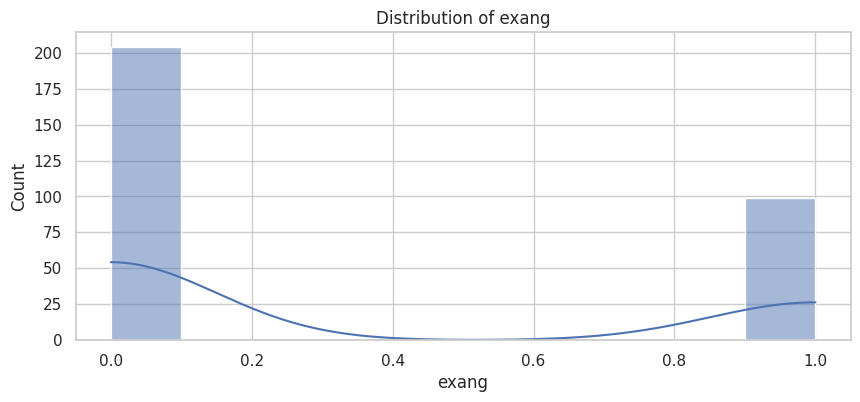

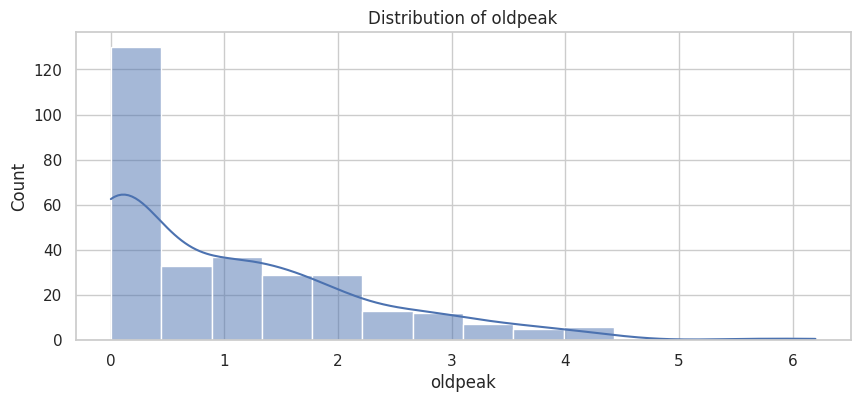

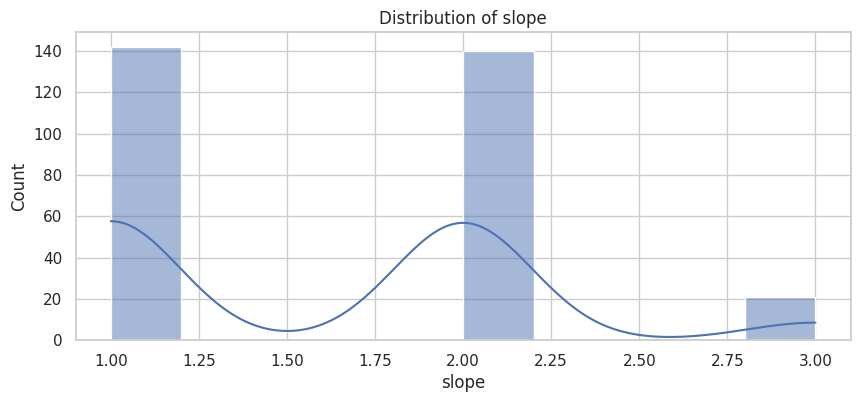

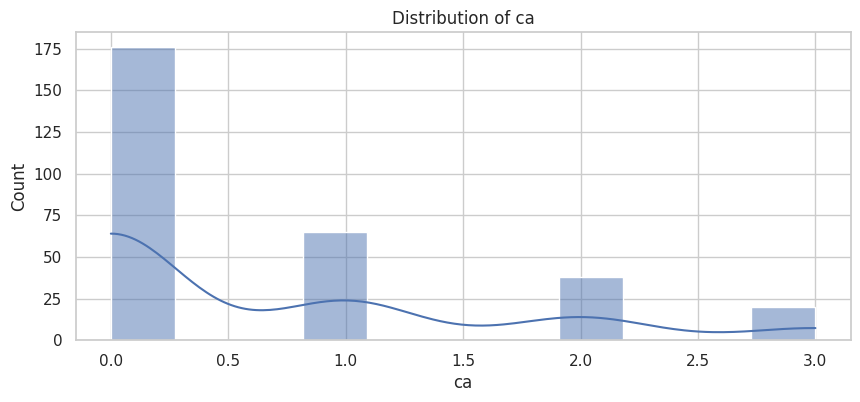

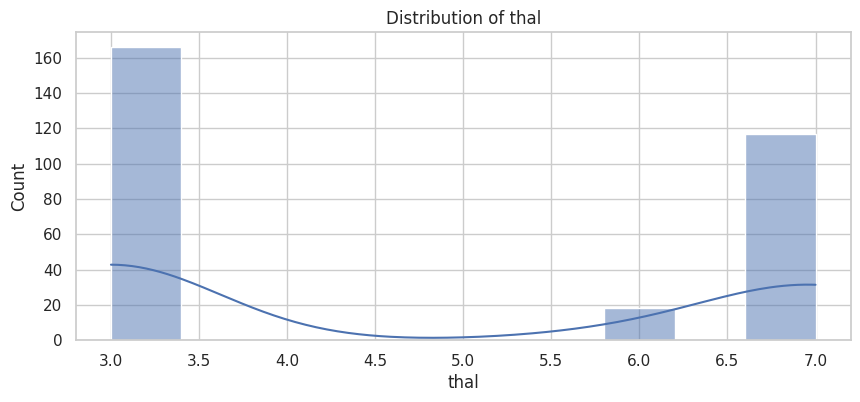

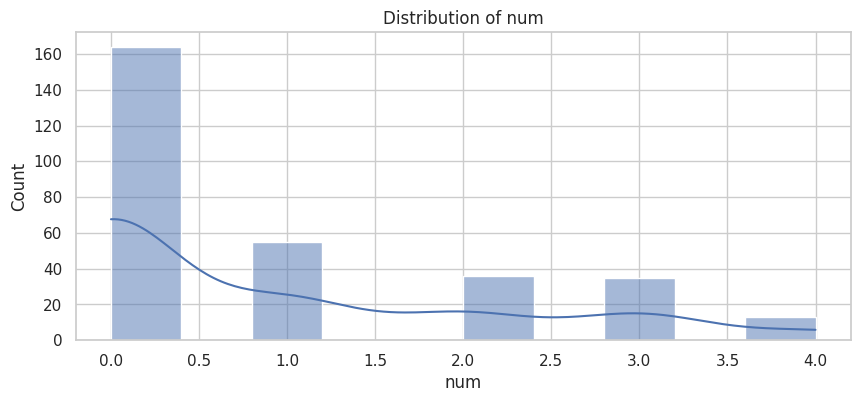

In [6]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the distribution of each feature
for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

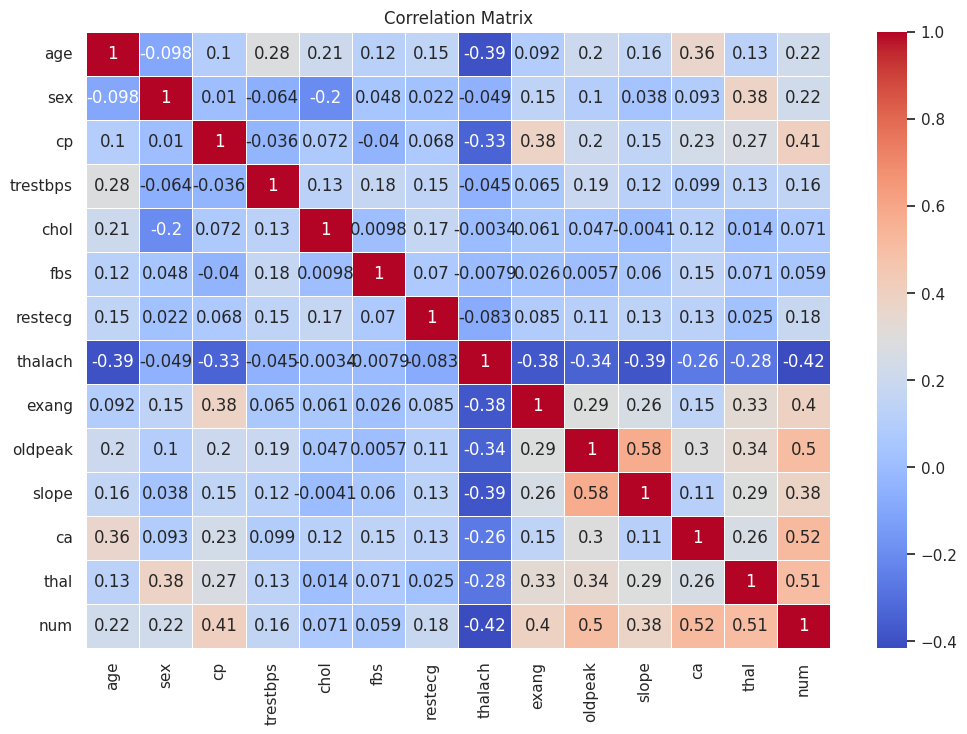

In [7]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

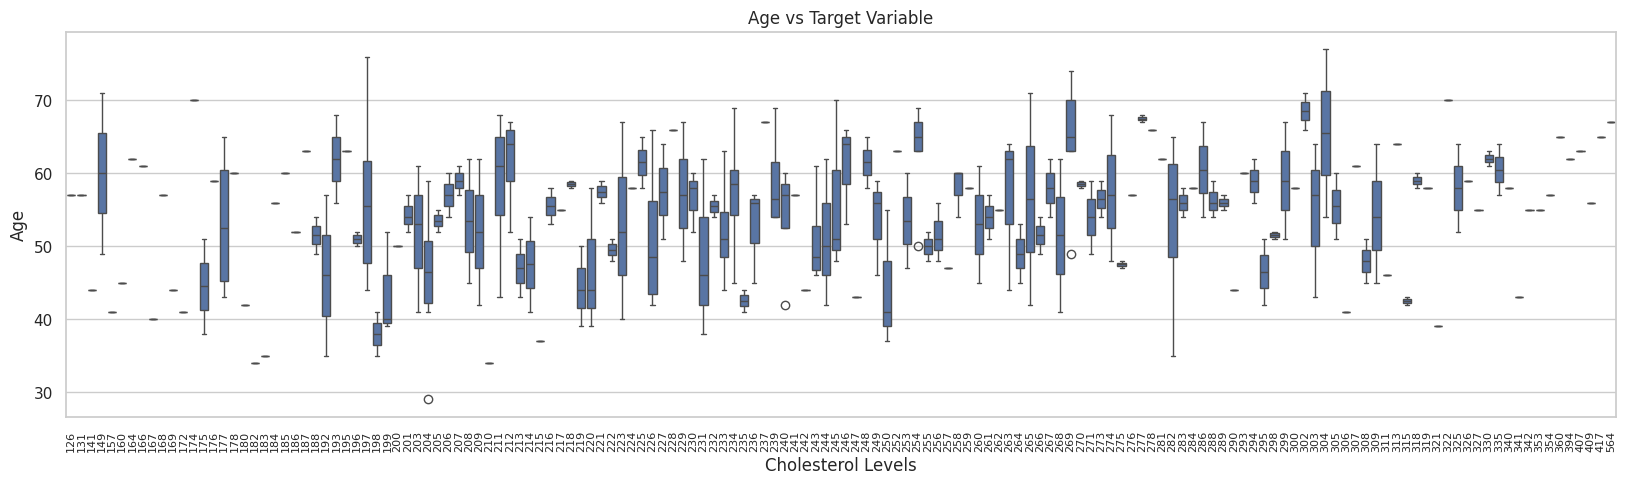

In [8]:
# Plot the relationship between age and target variable
plt.figure(figsize=(20, 5))
sns.boxplot(x='chol', y='age', data=df)
plt.title('Age vs Target Variable')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Age')
plt.xticks(rotation=90, fontsize=8)
plt.show()

# Interpretation:
# The boxplot shows the distribution of age for different cholesterol levels.
# From the graph above shows that higher cholesterol levels are associated with a wider age range, indicating that cholesterol levels vary significantly across different ages.

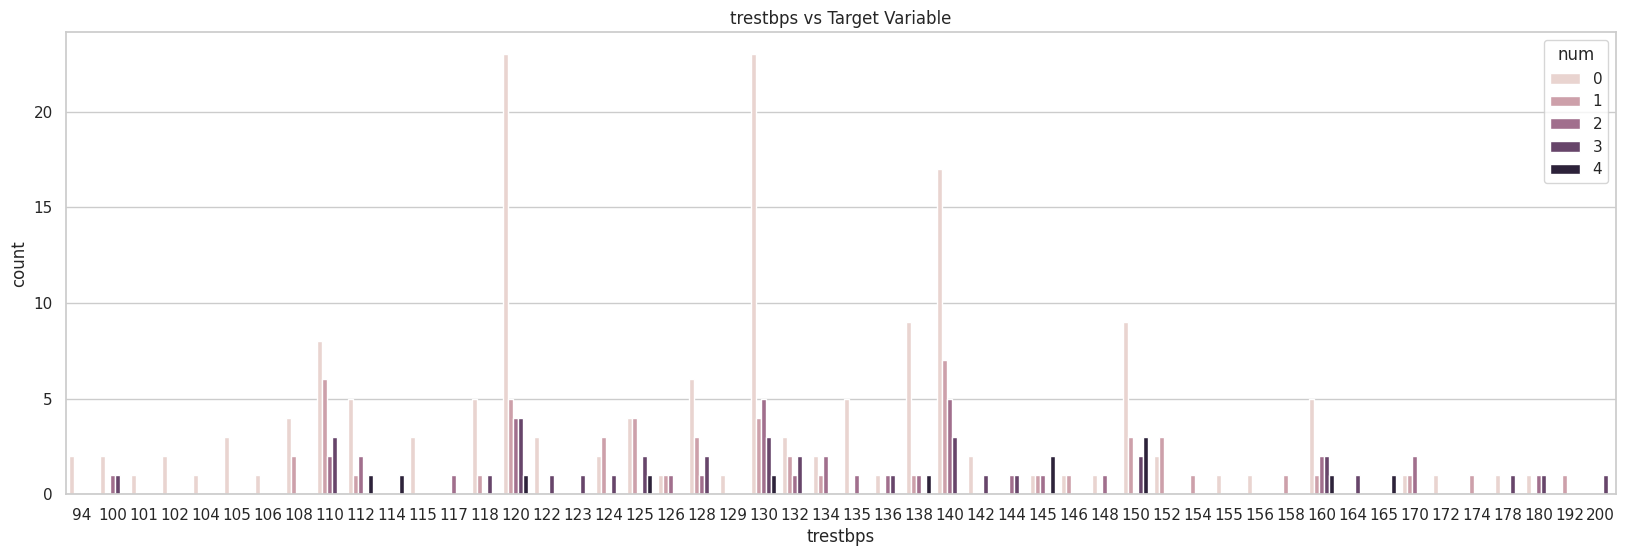

In [9]:
# Plot the relationship between trestbps and target variable
plt.figure(figsize=(20, 6))
sns.countplot(x='trestbps', hue='num', data=df)
plt.title('trestbps vs Target Variable')
plt.show()

# Interpretation:
# The countplot illustrates the distribution of resting blood pressure values for patients with and without heart disease.
# From observations higher blood pressure readings are more common among patients with heart disease.

In [10]:
# Display the first few rows of the DataFrame to verify
print("First few rows of the dataset:")
print(df.head())

# Check for missing values before handling
missing_values_before = df.isnull().sum()
print("\nMissing values before handling:")
print(missing_values_before)

# Replace missing values in 'ca' and 'thal' columns with the median value
df['chol'].fillna(df['chol'].median(), inplace=True)
df['thal'].fillna(df['thal'].median(), inplace=True)

# Check for missing values after handling
missing_values_after = df.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)

First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  

Missing values before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Missing values after handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
rest

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       147
           1       0.69      0.58      0.63        50
           2       0.38      0.09      0.15        33
           3       0.55      0.53      0.54        32
           4       0.42      0.45      0.43        11

    accuracy                           0.74       273
   macro avg       0.57      0.53      0.53       273
weighted avg       0.69      0.74      0.70       273


Confusion Matrix:
[[147   0   0   0   0]
 [ 17  29   0   4   0]
 [  9  11   3   7   3]
 [  6   1   4  17   4]
 [  1   1   1   3   5]]


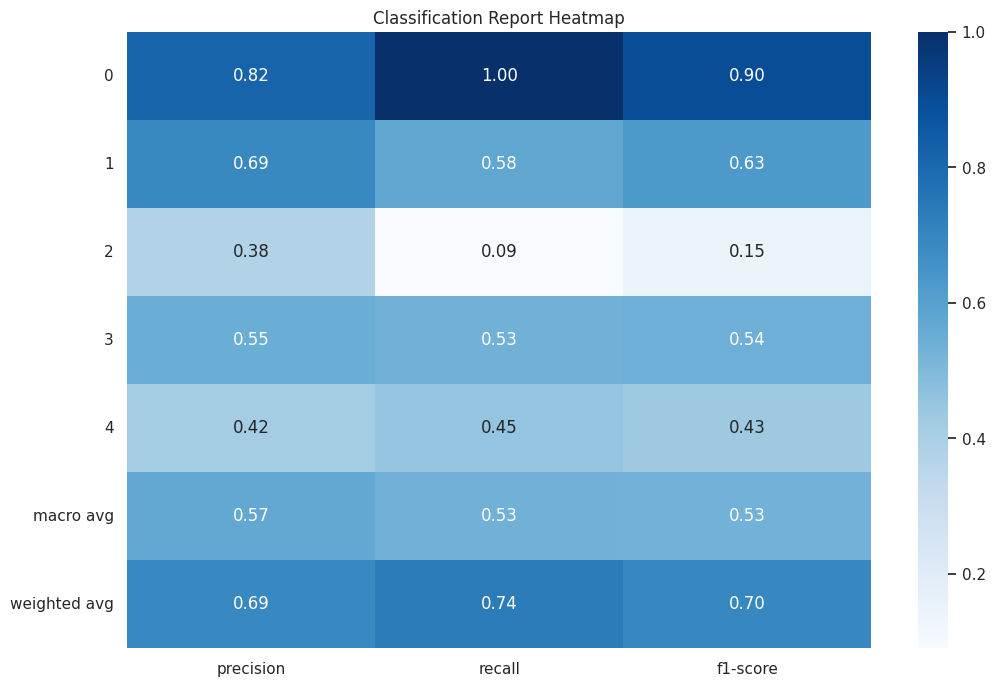

In [11]:
df['ca'].fillna(df['ca'].median(), inplace=True)
df['trestbps'].fillna(df['trestbps'].median(), inplace=True)

# Define features and target
X = df.drop('chol', axis=1)
y = df['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Get the classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Visualize the precision, recall, f1-score, and support as a heatmap
metrics = ['precision', 'recall', 'f1-score']
report_df = report_df.loc[report_df.index != 'accuracy']  # Remove the accuracy row

plt.figure(figsize=(12, 8))
sns.heatmap(report_df[metrics], annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.show()

**GridSearchCV for hypertuning**

In [12]:
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for hypertuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hypertuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


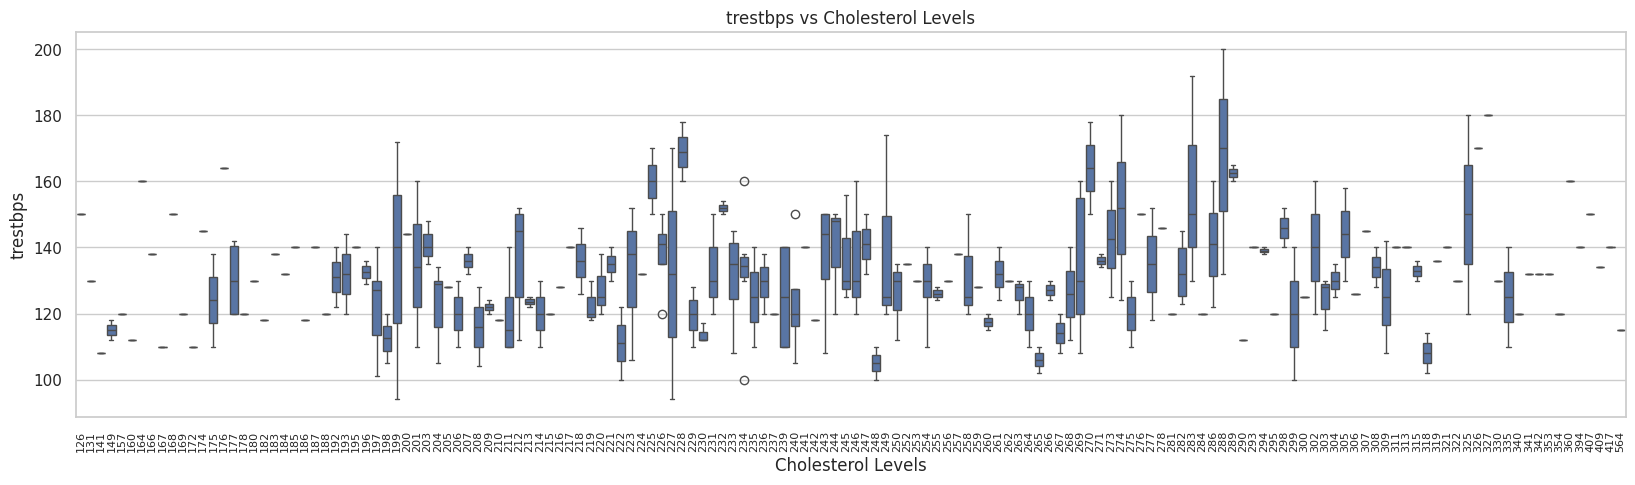

In [13]:
# Plot the relationship between trestbps and cholesterol levels
plt.figure(figsize=(20, 5))
sns.boxplot(x='chol', y='trestbps', data=df)
plt.title('trestbps vs Cholesterol Levels')
plt.xlabel('Cholesterol Levels')
plt.ylabel('trestbps')
plt.xticks(rotation=90, fontsize=8)
plt.show()

# Interpretation:
# The boxplot shows the relationship between resting blood pressure and cholesterol levels.
# Higher cholesterol levels seem to have a wider range of resting blood pressure values, indicating variability in blood pressure at different cholesterol levels.

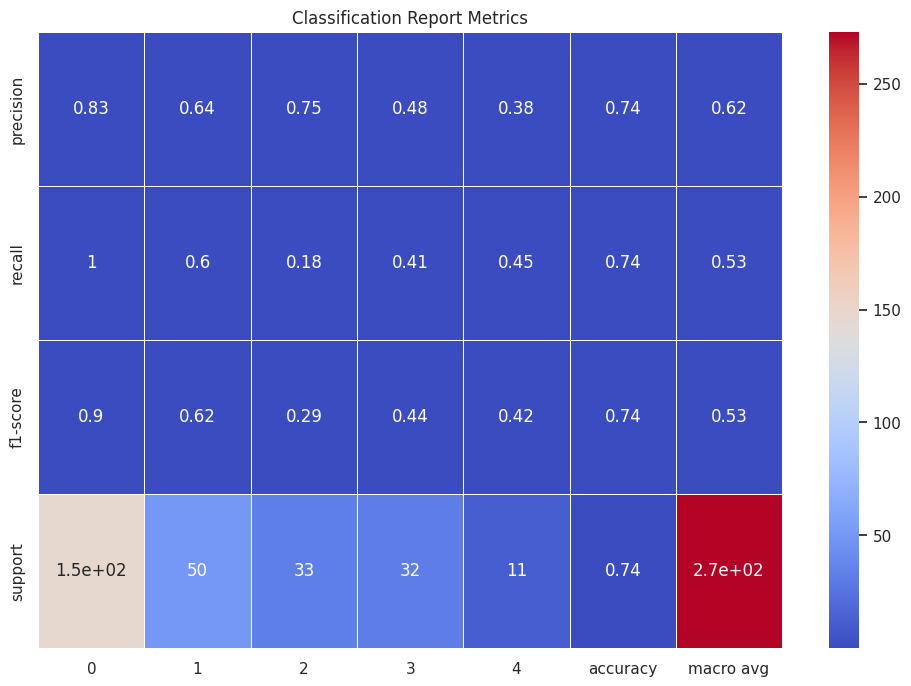

In [14]:
# Plot heatmap of precision, recall, f1-score, and support
plt.figure(figsize=(12, 8))
sns.heatmap(df_report[['precision', 'recall', 'f1-score', 'support']].iloc[:-1, :].T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Classification Report Metrics')
plt.show()

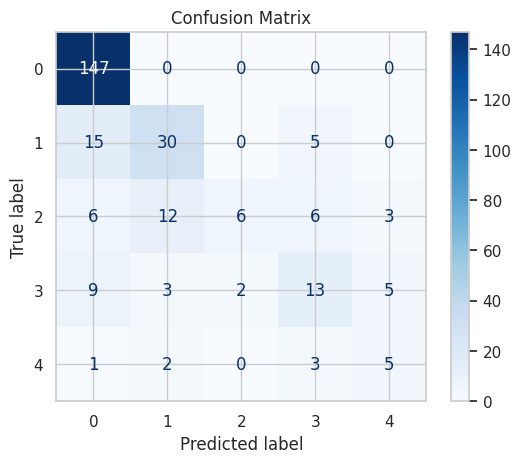

In [15]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Step 1: Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Scaling features
scaler = StandardScaler()
features = df_encoded.drop('num', axis=1)
features_scaled = scaler.fit_transform(features)

In [18]:
# Step 3: Clustering Algorithms

# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)
kmeans_silhouette = silhouette_score(features_scaled, kmeans_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(features_scaled)
agg_silhouette = silhouette_score(features_scaled, agg_labels)

In [20]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled)
dbscan_silhouette = silhouette_score(features_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

In [21]:
# Gaussian Mixture Models (GMMs)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(features_scaled)
gmm_silhouette = silhouette_score(features_scaled, gmm_labels)

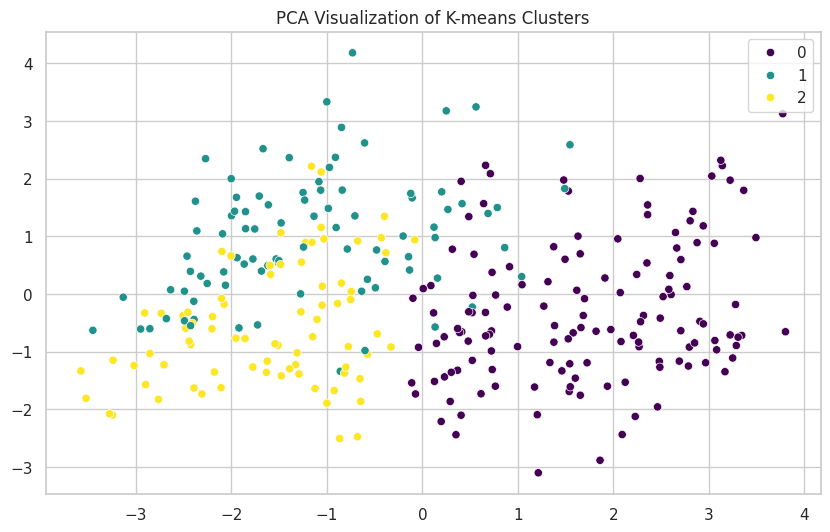

In [22]:
# Visualizing Clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('PCA Visualization of K-means Clusters')
plt.show()

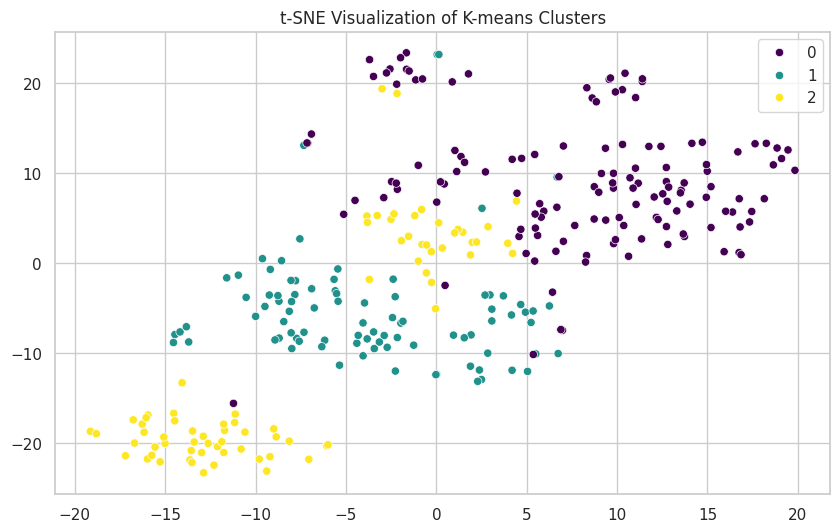

In [23]:
# Visualizing Clusters using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('t-SNE Visualization of K-means Clusters')
plt.show()

In [24]:
# Evaluate clustering performance
kmeans_db = davies_bouldin_score(features_scaled, kmeans_labels)
agg_db = davies_bouldin_score(features_scaled, agg_labels)
dbscan_db = davies_bouldin_score(features_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
gmm_db = davies_bouldin_score(features_scaled, gmm_labels)

In [25]:
results = {
    'Method': ['K-means', 'Hierarchical', 'DBSCAN', 'GMM'],
    'Silhouette Score': [kmeans_silhouette, agg_silhouette, dbscan_silhouette, gmm_silhouette],
    'Davies-Bouldin Index': [kmeans_db, agg_db, dbscan_db, gmm_db]
}

results_df = pd.DataFrame(results)
print(results_df)

         Method  Silhouette Score  Davies-Bouldin Index
0       K-means          0.118083              2.214706
1  Hierarchical          0.098770              2.533090
2        DBSCAN         -1.000000             -1.000000
3           GMM          0.102358              2.817652


From these metrics, we can conclude that **K-means is the best-performing clustering method for this dataset**. This is because it has the highest **Silhouette Score** and the **lowest Davies-Bouldin Index**, indicating better-defined and more compact clusters compared to the other methods. For example, The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. **The score ranges from -1 to 1, where a higher value indicates better clustering.**
In this case, K-means has the highest Silhouette Score (0.118083), followed by GMM (0.102358), Hierarchical (0.098770), and DBSCAN (-1.000000). Whereas **Davies-Bouldin Index:** The Davies-Bouldin Index is a measure of the average similarity ratio of each cluster with the cluster that is most similar to it. A lower value indicates better clustering.
Here, **K-means has the lowest Davies-Bouldin Index (2.214706)**, followed by Hierarchical (2.533090), GMM (2.817652), and DBSCAN (-1.000000).

In [26]:
# Identify outliers using the IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Apply outlier detection to relevant columns
outlier_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for column in outlier_columns:
    outliers = identify_outliers(df, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

# remove outliers
for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Shape of dataset after outlier removal:", df.shape)

Number of outliers in age: 0
Number of outliers in trestbps: 9
Number of outliers in chol: 5
Number of outliers in thalach: 1
Number of outliers in oldpeak: 5
Shape of dataset after outlier removal: (284, 14)


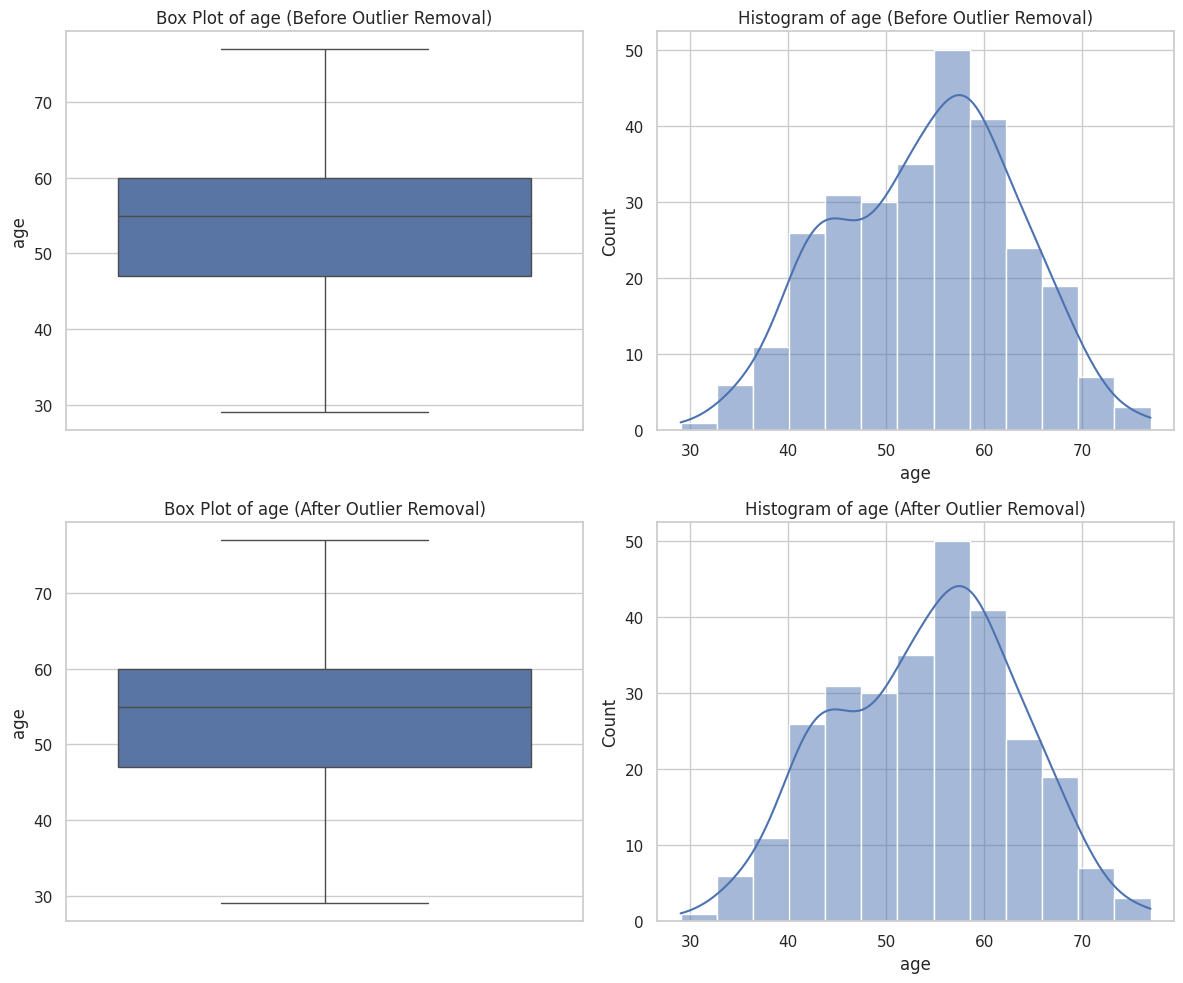

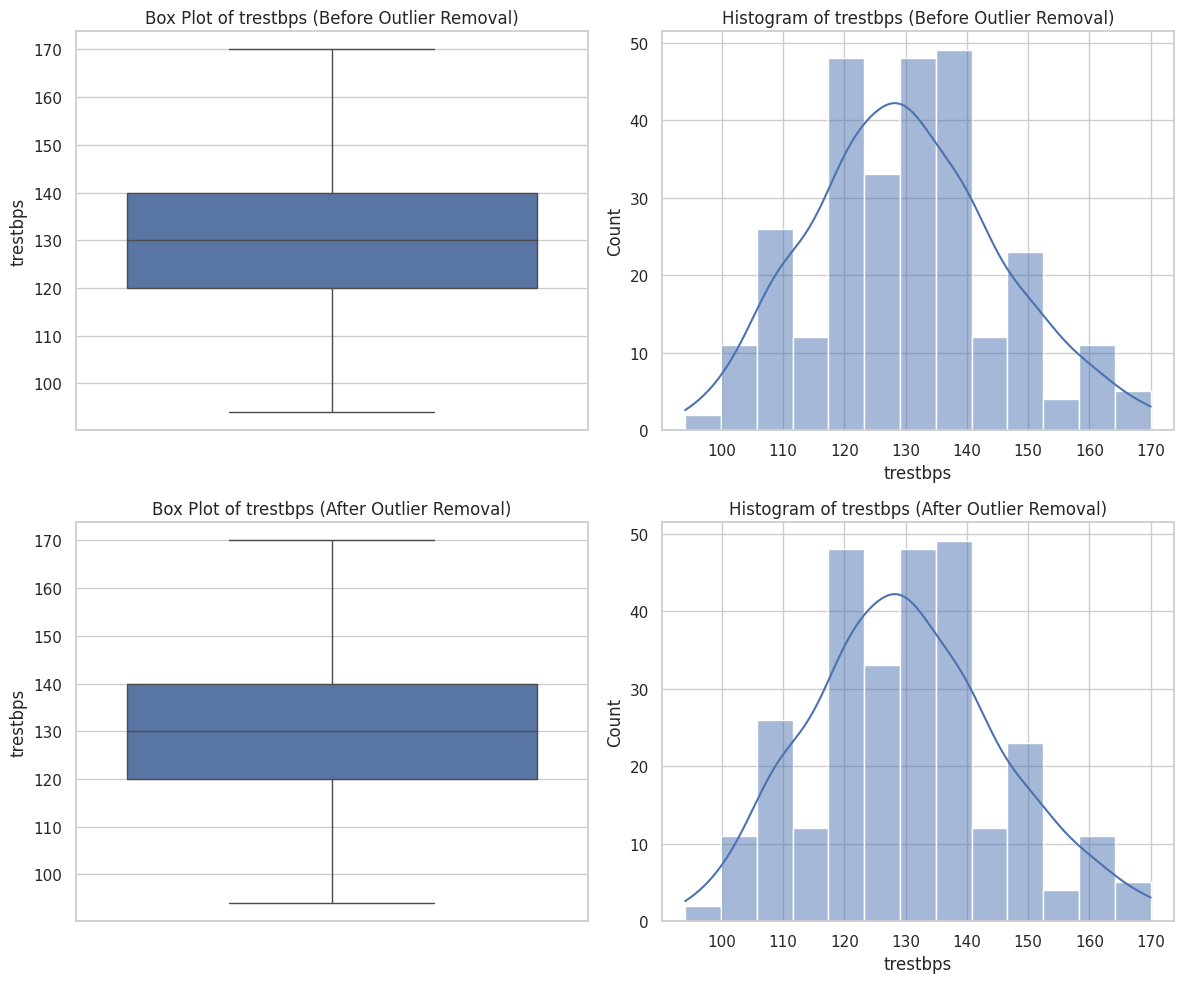

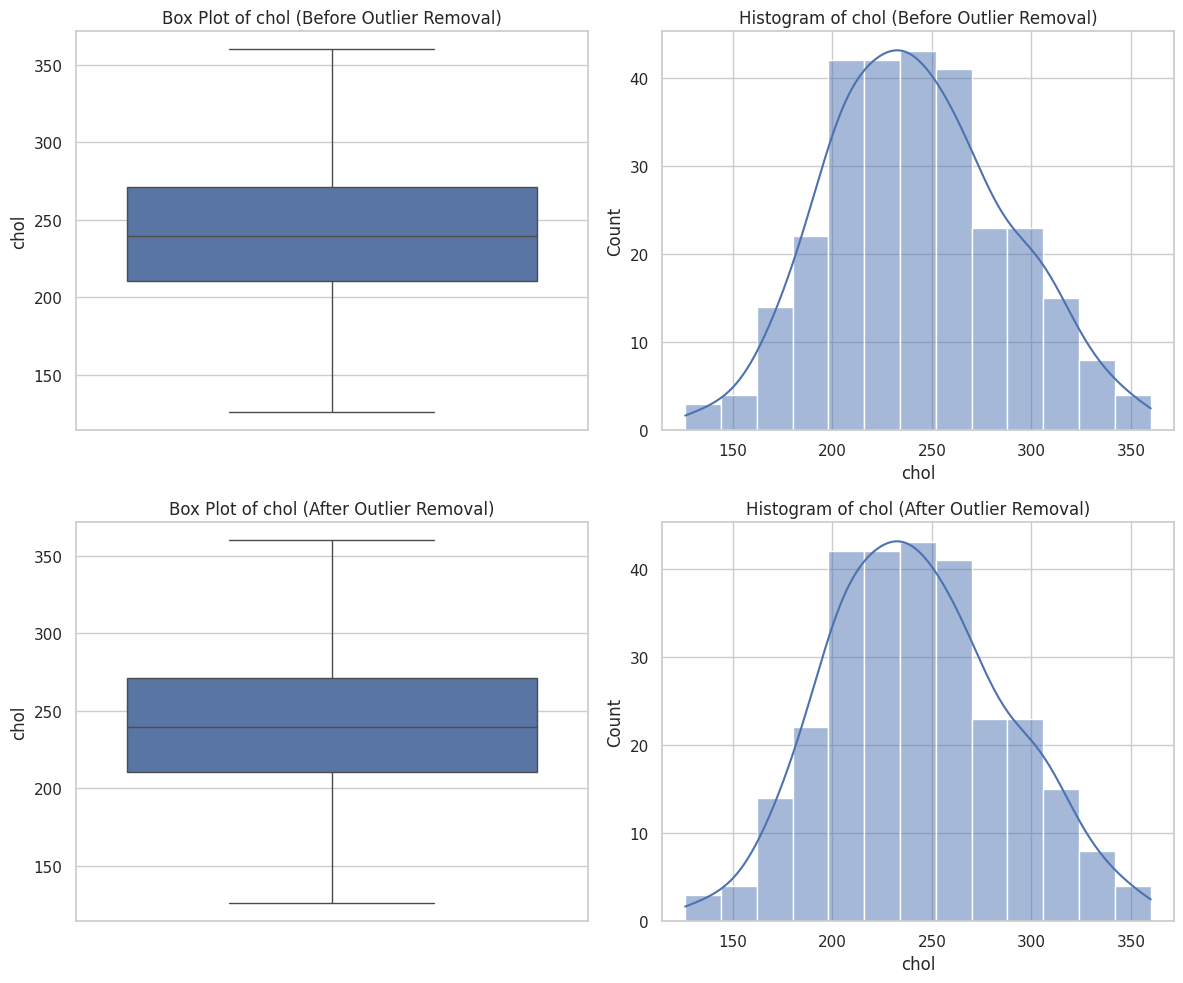

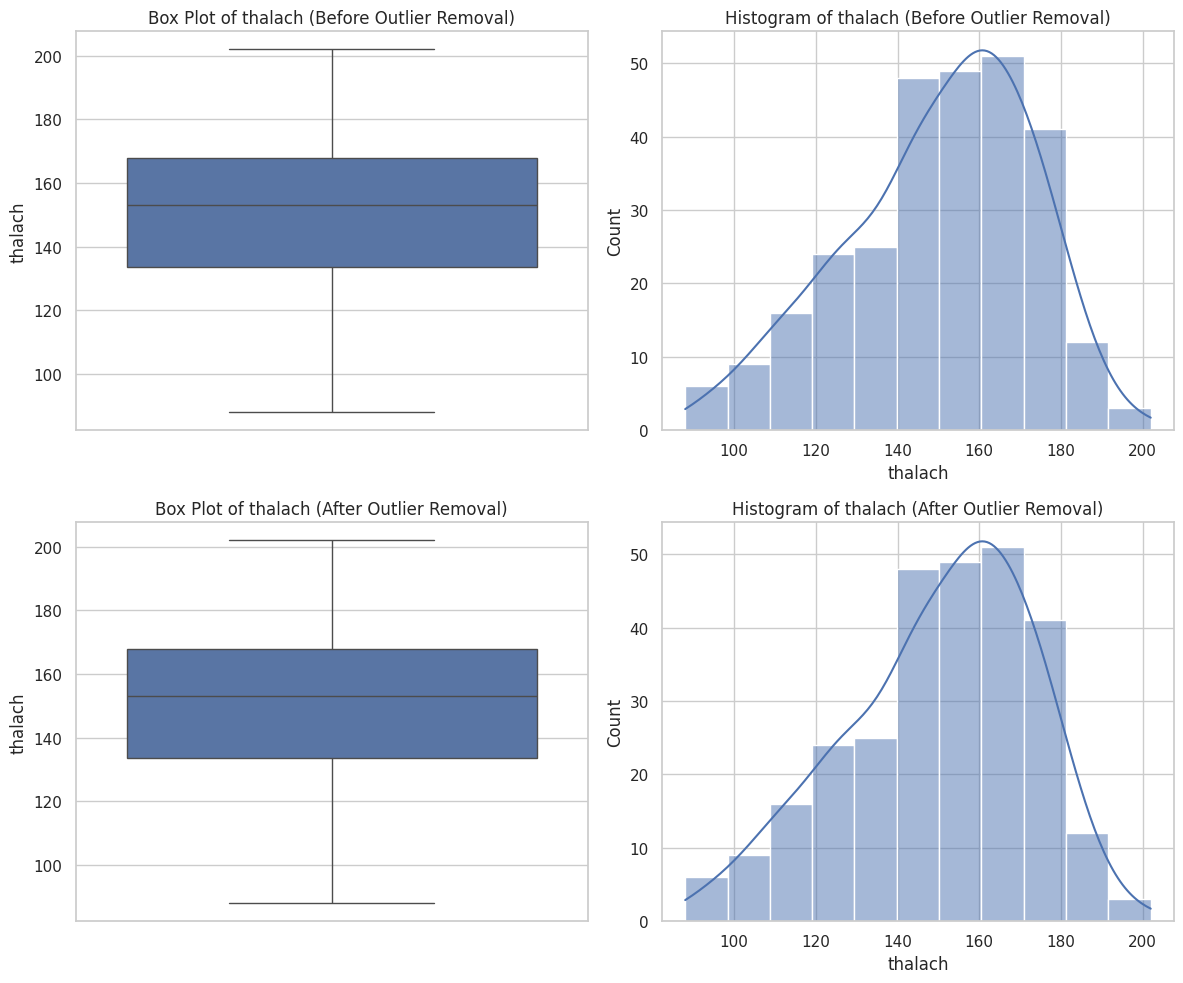

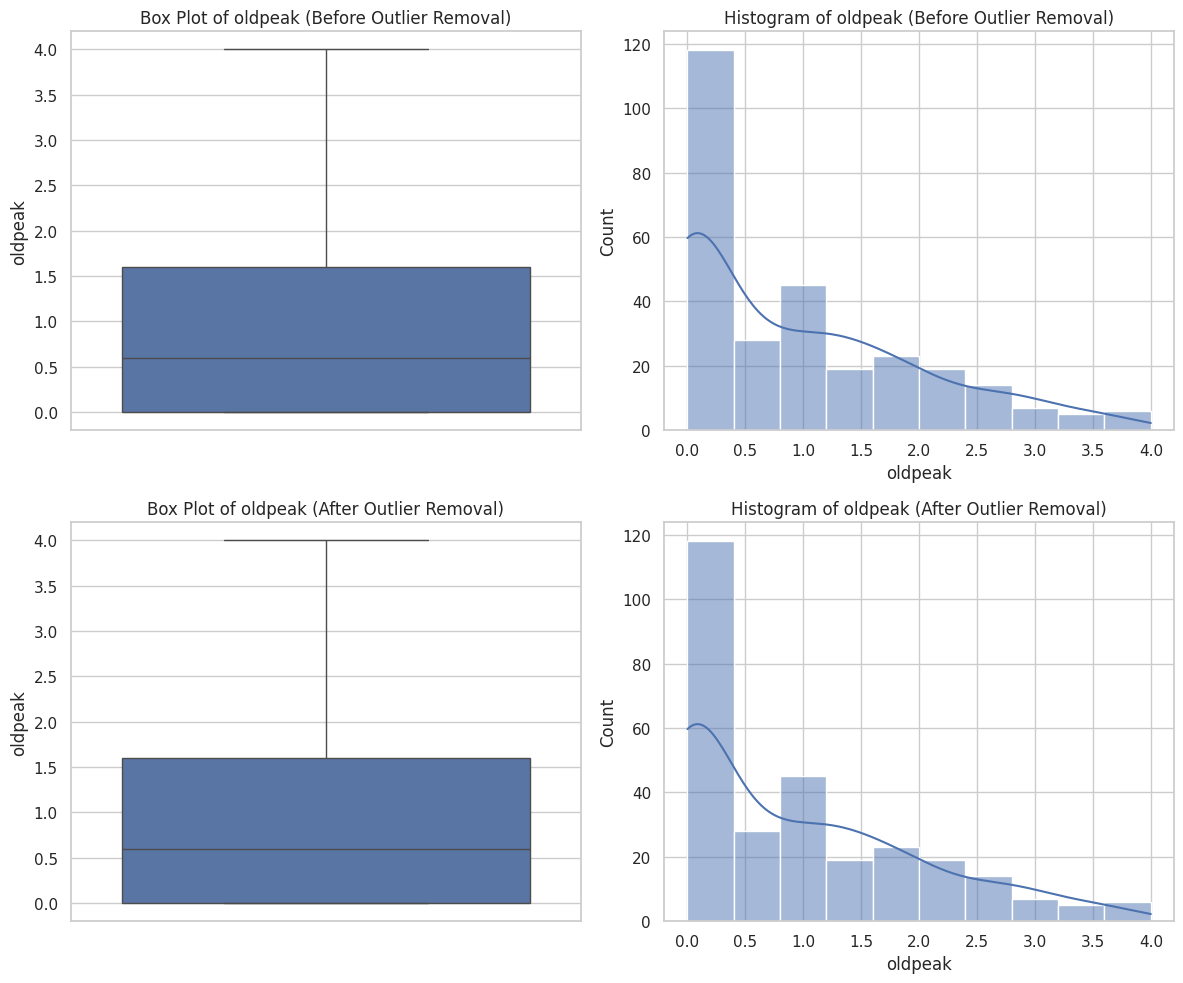

Shape of dataset after outlier removal: (284, 14)


In [27]:
# Function to plot box plots and histograms before and after outlier removal
def plot_outlier_removal(df, column):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Box plot before outlier removal
    sns.boxplot(y=df[column], ax=axes[0, 0])
    axes[0, 0].set_title(f'Box Plot of {column} (Before Outlier Removal)')

    # Histogram before outlier removal
    sns.histplot(df[column], kde=True, ax=axes[0, 1])
    axes[0, 1].set_title(f'Histogram of {column} (Before Outlier Removal)')

    # Identify and remove outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Box plot after outlier removal
    sns.boxplot(y=df_no_outliers[column], ax=axes[1, 0])
    axes[1, 0].set_title(f'Box Plot of {column} (After Outlier Removal)')

    # Histogram after outlier removal
    sns.histplot(df_no_outliers[column], kde=True, ax=axes[1, 1])
    axes[1, 1].set_title(f'Histogram of {column} (After Outlier Removal)')

    plt.tight_layout()
    plt.show()

# Plot outlier removal for each column
outlier_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for column in outlier_columns:
    plot_outlier_removal(df, column)

# remove outliers from the original dataset
for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("Shape of dataset after outlier removal:", df.shape)

